In [1]:
!pip install wordcloud

import re
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Fake News Detection Project
    #1.Data loading and exploration
        # In this section, we load the dataset and perform initial data exploration.

#Load the dataset
news_data = pd.read_csv('news_dataset.csv')

#Printing to see how the dataset looks like
print(f'Data before dropping the first column:\n\n {news_data.head(3)}\n\n')

Data before dropping the first column:

    Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  




In [3]:
#get rid of unnamed index column in the dataset because it is already indexed
news_data = news_data.drop('Unnamed: 0', axis=1)
print(f'Data after dropping the first column:\n\n {news_data.head(3)}\n\n')

Data after dropping the first column:

                                                title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  




In [4]:
#Check the information of the dataset
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
#Check null values in the dataset
print(f"{news_data.isnull().sum()}")

title    558
text      39
label      0
dtype: int64


In [6]:
#Check whether the dataset is imbalanced or not
print(news_data['label'].value_counts(normalize=True))

label
1    0.514404
0    0.485596
Name: proportion, dtype: float64


We can see that the dataset is balanced 51.44% to 48.55%

In [7]:
#Check the ratio of null values compared to values for each column
news_data.isnull().sum() / len(news_data)

title    0.007736
text     0.000541
label    0.000000
dtype: float64

Since null counts in each column are less than 1%, we can drop null values.

In [8]:
#2.Data preprocessing 
    #In this section, we transform the data into optimal format for machine learning models.
    #Steps: handling the null values, feature engineering, text cleaning, TF-IDF vectorization

#Drop the null values in the dataset
news_data_no_nulls = news_data.dropna().copy()

#Check how many rows are dropped
print(f"Dropped {len(news_data) - len(news_data_no_nulls)} rows")

Dropped 597 rows


In [9]:
#Check duplicate values
news_data_no_nulls.duplicated().sum()

8416

Since there are 8416 duplicate rows, we can drop them.

In [10]:
#Drop duplicate values
news_data_no_nulls = news_data_no_nulls.drop_duplicates()

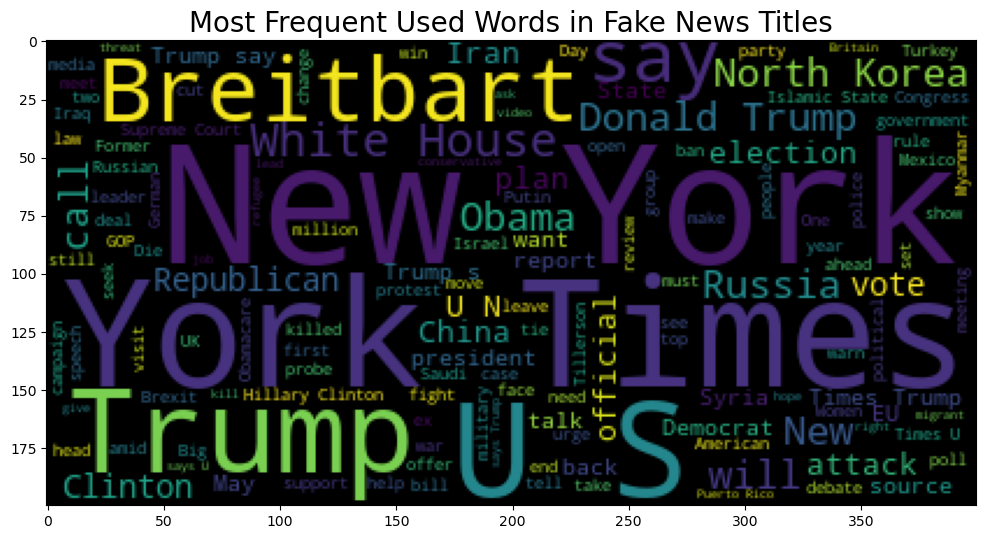

In [11]:
#Create wordcloud visualization for fake news titles

#Filter fake news (label=0), join all titles into single string, generate wordcloud
fake_titles = ' '.join(news_data_no_nulls.loc[news_data_no_nulls.label == 0]['title'])
wordcloud_fake = WordCloud().generate(fake_titles)

#Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_fake)
plt.title("Most Frequent Used Words in Fake News Titles",fontsize=20)
plt.show()

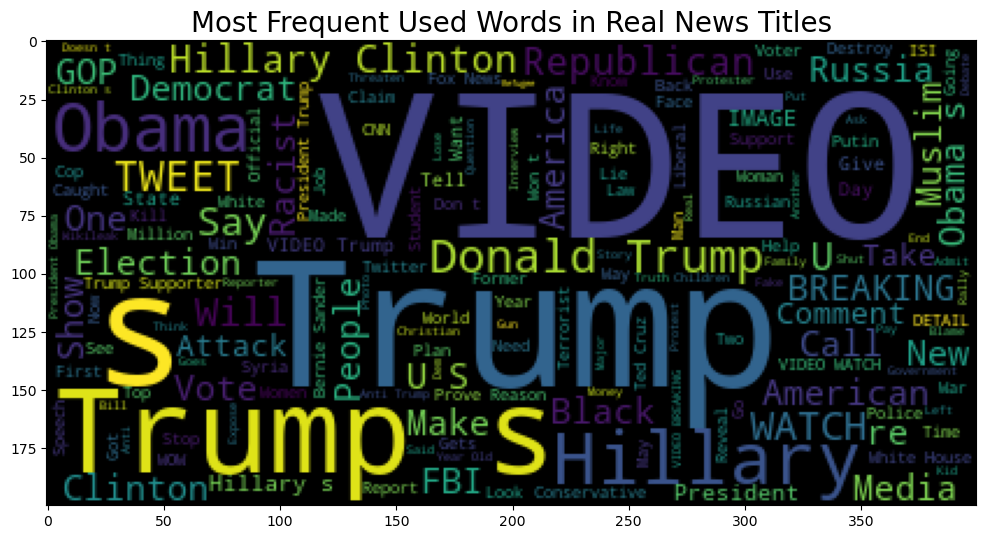

In [12]:
#Create wordcloud visualization for real news titles

#Filter real news (label=1), join all titles into single string, generate wordcloud
real_titles = ' '.join(news_data_no_nulls.loc[news_data_no_nulls.label == 1]['title'])
wordcloud_real = WordCloud().generate(real_titles)

#Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_real)
plt.title("Most Frequent Used Words in Real News Titles",fontsize=20)
plt.show()

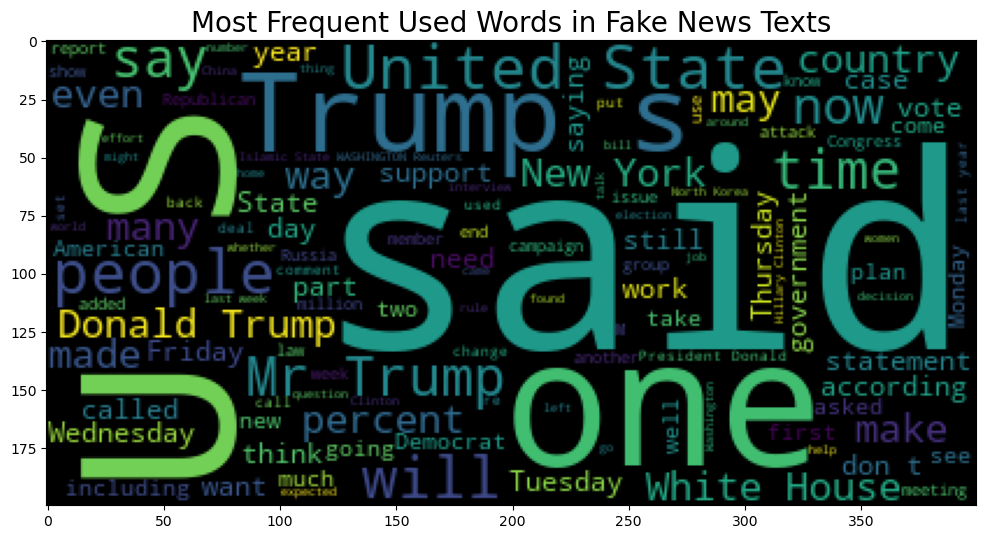

In [13]:
#Create wordcloud visualization for fake news texts

#Filter fake news (label=0), join all texts into single string, generate wordcloud
fake_text = ' '.join(news_data_no_nulls.loc[news_data_no_nulls.label == 0]['text'])
wordcloud_fake = WordCloud().generate(fake_text)

#Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_fake)
plt.title("Most Frequent Used Words in Fake News Texts",fontsize=20)
plt.show()

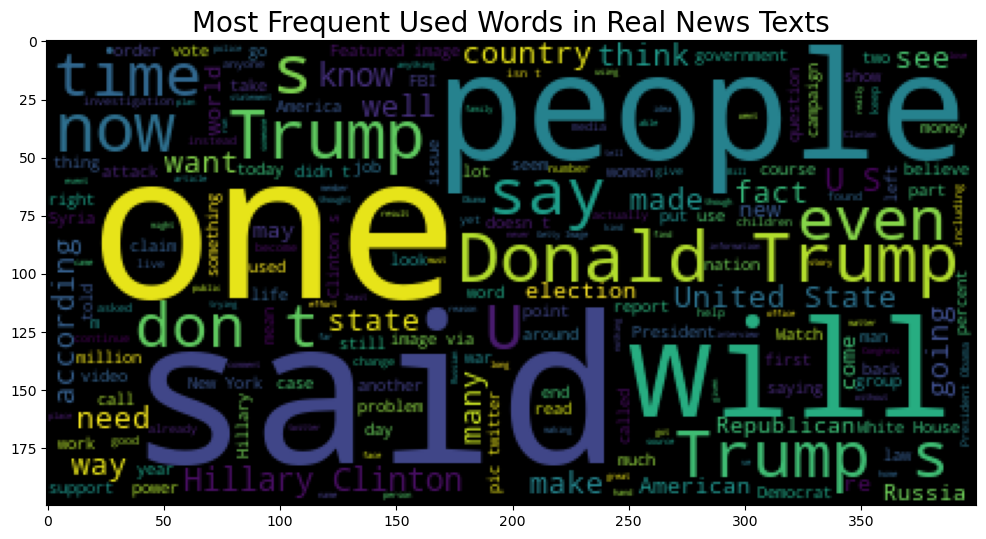

In [15]:
#Create wordcloud visualization for fake news texts

#Filter fake news (label=1), join all texts into single string, generate wordcloud
real_text = ' '.join(news_data_no_nulls.loc[news_data_no_nulls.label == 1]['text'])
wordcloud_real = WordCloud().generate(real_text)

#Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_real)
plt.title("Most Frequent Used Words in Real News Texts",fontsize=20)
plt.show()

In [14]:
#Feature engineering: Create features that are useful

#Count the number of words that are full capital 
def caps_count(text):

    words = str(text).split()
    return sum(1 for word in words if word.isupper() and len(word) > 1)

# Count the number of exclamation marks.
def exclamation_count(text):
    return str(text).count('!')
    
#Count the number of ellipses (...)
def ellipsis_count(text):
    return str(text).count('...')

#Count the number of question marks
def question_mark_count(text):
    return str(text).count('?')

#Count the number of sentences
def avg_sentence_count(text):
    sentences = str(text).split('.')
    sentences = [s.strip() for s in sentences if s.strip()]
    if len(sentences) == 0:
        return 0
    word_counts = [len(s.split()) for s in sentences]
    return sum(word_counts) / len(sentences)

#Feature extraction to title and text columns(all caps)
news_data_no_nulls['title_caps_words'] = news_data_no_nulls['title'].apply(caps_count)
news_data_no_nulls['text_caps_words'] = news_data_no_nulls['text'].apply(caps_count)

#Feature extraction to title and text columns(exclamation)
news_data_no_nulls['title_exclamation'] = news_data_no_nulls['title'].apply(exclamation_count)
news_data_no_nulls['text_exclamation'] = news_data_no_nulls['text'].apply(exclamation_count)

#Feature extraction to title and text columns(ellipses)
news_data_no_nulls['title_dots'] = news_data_no_nulls['title'].apply(ellipsis_count)
news_data_no_nulls['text_dots'] = news_data_no_nulls['text'].apply(ellipsis_count)

news_data_no_nulls['title_question_mark'] = news_data_no_nulls['title'].apply(question_mark_count)
news_data_no_nulls['text_question_mark'] = news_data_no_nulls['text'].apply(question_mark_count)

news_data_no_nulls['title_avg_sentence_count'] = news_data_no_nulls['title'].apply(avg_sentence_count)
news_data_no_nulls['text_avg_sentence_count'] = news_data_no_nulls['text'].apply(avg_sentence_count)

news_data_clean = news_data_no_nulls.copy()

#Lowercase and punctuation removal for TF-IDF
news_data_clean['title_clean'] = news_data_no_nulls['title'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
news_data_clean['text_clean'] = news_data_no_nulls['text'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
news_data_clean.head(3)

,title,text,label,title_caps_words,text_caps_words,title_exclamation,text_exclamation,title_dots,text_dots,title_question_mark,text_question_mark,title_avg_sentence_count,text_avg_sentence_count,title_clean,text_clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,7,6,0,2,0,0,0,7,18.0,16.000000,law enforcement on high alert following threat...,no comment is expected from barack obama membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,11,0,1,0,0,0,0,0,18.0,17.000000,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,0,12,0,0,0,0,0,1,16.0,21.868852,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...


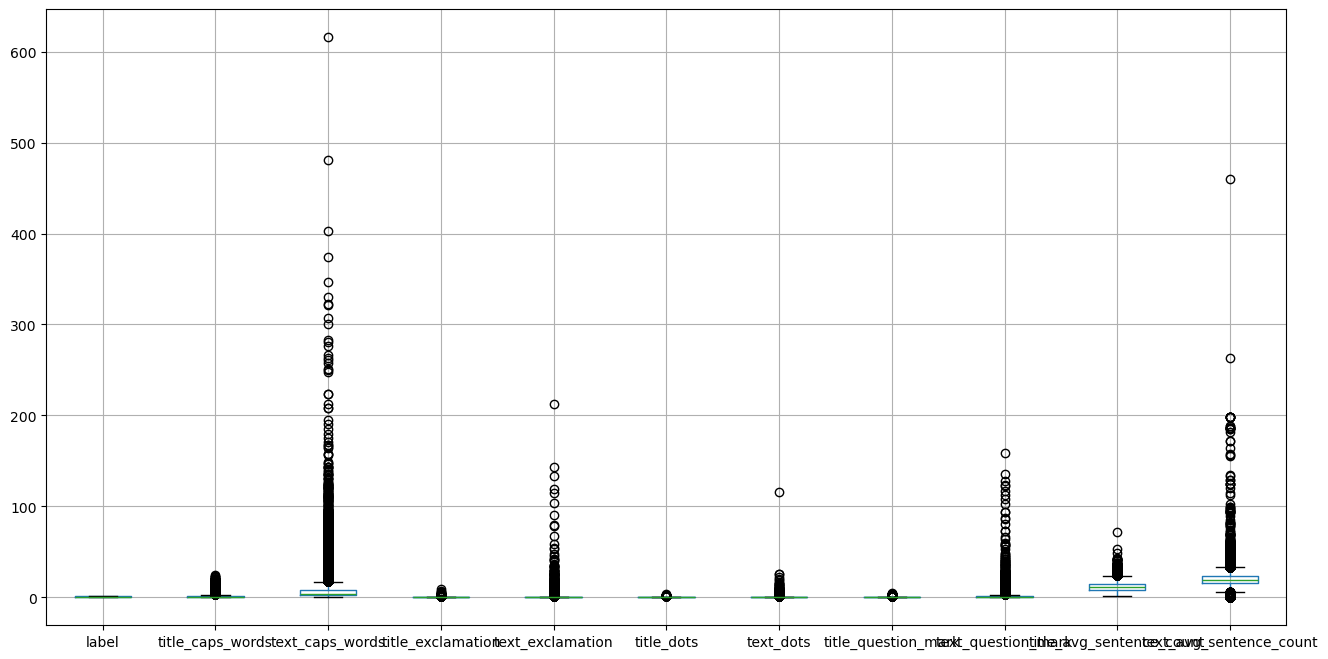

In [15]:
#Visualize boxplot to identify outliers
news_data_clean.boxplot(figsize=(16,8))
plt.show()

Outliers represent extreme fake news patterns such as overused caps, exclamation marks, ellipsis
We keep outliers because they help the model to detect fake news from real news.

In [16]:
news_data_clean[news_data_clean['text_caps_words'] > 100]['text'].values[0]

"HILLARY WILL LAND IN PRISON, NOT THE OVAL OFFICE Posted on Tweet Home » Headlines » World News » HILLARY WILL LAND IN PRISON, NOT THE OVAL OFFICE \nFBI Director James Comey has caved to the pressure of his outraged employees at the FBI, and re-opened the CRIMINAL investigation of Hilary Clinton. With less than two weeks until the election, it would seem that Hilary is more likely to enter a prison cell than the Oval office: 2017 Gold Pandas and 2017 Silver Pandas Are Now Available! Secure Your 2017 Panda Coins Today at SD Bullion! You must be logged in to post a comment. Today's Top Articles Privacy Policy THE ANALYSIS AND DISCUSSION PROVIDED ON SILVERDOCTORS IS FOR YOUR EDUCATION AND ENTERTAINMENT ONLY, IT IS NOT RECOMMENDED FOR TRADING PURPOSES. THE DOC IS NOT AN INVESTMENT ADVISER AND INFORMATION OBTAINED HERE SHOULD NOT BE TAKEN FOR PROFESSIONAL INVESTMENT ADVICE. THE COMMENTARY ON SILVERDOCTORS REFLECTS THE OPINIONS OF THE DOC AND OTHER CONTRIBUTING AUTHORS. YOUR OWN DUE DILIGENC

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

#Apply TF-IDF vectorization to convert text into numerical features

#Create separate vectorizers for title and text (max 3000 most important words)
vectorizer_title = TfidfVectorizer(max_features=3000)
vectorizer_text = TfidfVectorizer(max_features=3000)

#Fit and transform the cleaned text data into TF-IDF sparse matrices
X_title = vectorizer_title.fit_transform(news_data_clean['title_clean'])
X_text = vectorizer_text.fit_transform(news_data_clean['text_clean'])

#Drop original text columns because they are not necessarry anymore
news_data_clean = news_data_clean.drop(columns=['title', 'text', 'title_clean', 'text_clean'])

#Display vocabulary and TF-IDF scores to verify (Which word has what score? (for first row))
print(vectorizer_text.get_feature_names_out())
pd.DataFrame(X_text[0].toarray(), columns=vectorizer_text.get_feature_names_out())

['000' '10' '100' ... 'zone' 'на' 'что']


,000,10,100,11,12,13,14,15,16,17,...,youre,yourself,youth,youtube,youve,zero,zika,zone,на,что
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.036298,0.0,0.0,0.0,0.0,0.0,0.0


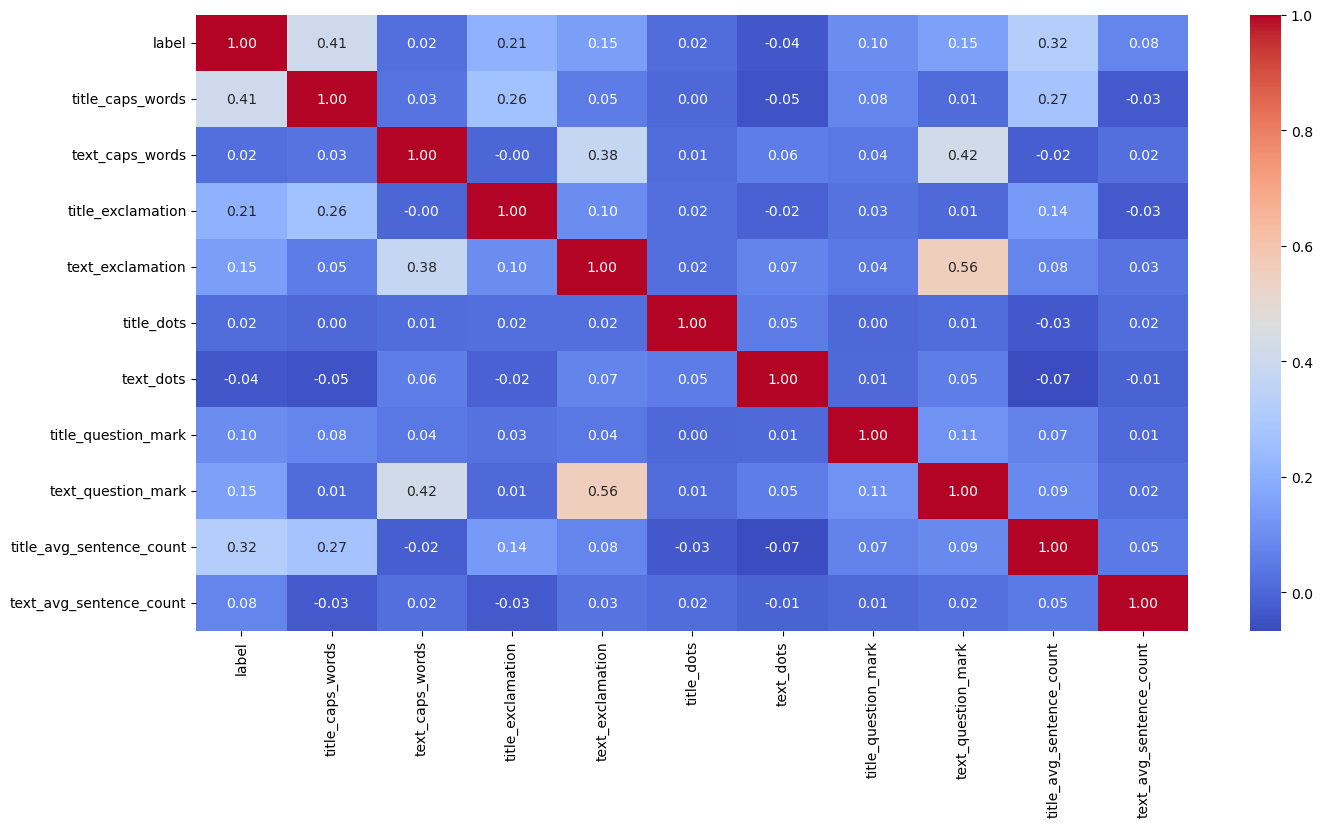

In [18]:
#Correlation heatmap to visualize relationships between features
#Identify which features are strongly correlated with the label which is fake or real
plt.figure(figsize=(16,8))
sns.heatmap(news_data_clean.corr(), annot= True, cmap="coolwarm", fmt='.2f')
plt.show()

Looking at the correlation heatmap we can see that most important features are title_caps_words,title_avg_sentence_count,  title_exclamation, text_exclamation, and text_question_mark

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#Select most impactful features to combine with TF-IDF vectors
other_features = news_data_clean[['title_caps_words', 'title_avg_sentence_count', 'title_exclamation', 'text_exclamation', 'text_question_mark']]

#Combine TF-IDF vectors and features
X = hstack([X_title, X_text, other_features.values])
y = news_data_clean['label']

#Split data into training and testing (80% for training and 20% for testing)
#Use stratification to make sure to balance fake/real ratio in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

#Scale the features to get better model performance
#If we don't use with_mean=False we get ValueError: Cannot center sparse matrices
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier
#Hyperparameter tuning

#Hyperparameter grid
    # n_estimators: number of trees
    # max_depth: maximum depth of each tree (None means unlimited)
    # min_samples_split: minimum samples to split a node
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

#Grid search with 5-fold cross validation
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print('Best RF parameters:', grid_rf.best_params_)

#Get the best model and make predictions
best_rf = grid_rf.best_estimator_
y_pred_train_rf = best_rf.predict(X_train)
y_pred_rf = best_rf.predict(X_test)


#Evaluate the model
training_accuracy =  accuracy_score(y_train, y_pred_train_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'\ntraining accuracy: {training_accuracy: .4f}\n')
print(f'model accuracy: {accuracy: .4f}\n')

print('Classification report:\n', classification_report(y_test, y_pred_rf))


Best RF parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

training accuracy:  1.0000

model accuracy:  0.9648

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6959
           1       0.96      0.96      0.96      5666

    accuracy                           0.96     12625
   macro avg       0.96      0.96      0.96     12625
weighted avg       0.96      0.96      0.96     12625



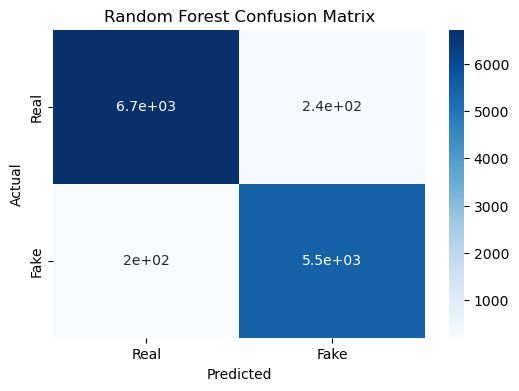

In [21]:
#Confusion matrix to visualize model predicted vs actual values
cm_rf = confusion_matrix(y_test, y_pred_rf) 

#Diagonal values means correct predictions, non-diagonal means misclassifications
#Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Looking at the confusion matrix heatmap we can see that there around 

True Negatives (6.7k): Correctly predicted real news as real
True Positives (5.5k): Correctly predicted fake news as fake
False Positives (240): Real news incorrectly predicted as fake
False Negatives (200): Fake news incorrectly predicted as real

In [22]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
#Hyperparameter tuning

#Hyperparameter grid
    # penalty: regularization type (l2 means Ridge)
    # solver: optimization algorithm (liblinear is fast for small/medium data)
    # C: inverse of regularization strength (lower means more regularization)
param_grid = {
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'C': [0.1, 1, 10]
}

#Grid search with 5-fold cross validation
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

#Get the best model and make predictions
best_logreg = grid_search.best_estimator_
y_pred_train_logreg = best_logreg.predict(X_train)
y_pred_logreg = best_logreg.predict(X_test)

#Evaluate the model
training_accuracy = accuracy_score(y_train, y_pred_train_logreg)
accuracy = accuracy_score(y_test, y_pred_logreg)

print(f'\ntraining accuracy: {training_accuracy: .4f}\n')
print(f'model accuracy: {accuracy: .4f}\n')
print('Classification report:\n', classification_report(y_test, y_pred_logreg))

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

training accuracy:  1.0000

model accuracy:  0.9632

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6959
           1       0.96      0.96      0.96      5666

    accuracy                           0.96     12625
   macro avg       0.96      0.96      0.96     12625
weighted avg       0.96      0.96      0.96     12625



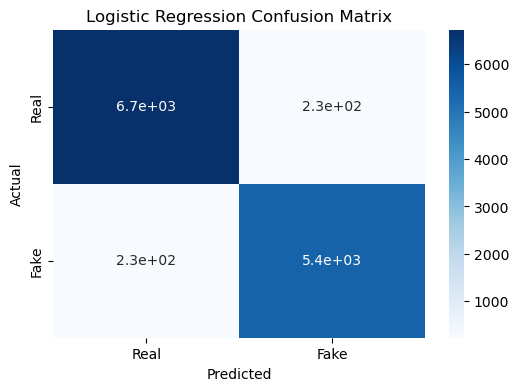

In [23]:
#Confusion matrix to visualize model predicted vs actual values
cm_log = confusion_matrix(y_test, y_pred_logreg) 

#Diagonal values means correct predictions, non-diagonal means misclassifications
#Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier

#Multi Layer Perceptron

#Hyperparameter grid
    #hidden_layer_sizes: (100,) means 1 layer with 100 neurons, (100, 50) means 1 layer with 100 and 1 layer with 50 neurons
    #alpha: regularization strength to prevent overfitting
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'alpha': [0.0001, 0.001],
}

#Grid search with 5-fold cross validation
grid_mlp = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), param_grid_mlp, cv=3, scoring='accuracy')
grid_mlp.fit(X_train, y_train)
print('Best MLP parameters:', grid_mlp.best_params_)

#Get the best model and make predictions
best_mlp = grid_mlp.best_estimator_
y_pred_train_mlp = best_mlp.predict(X_train)
y_pred_mlp = best_mlp.predict(X_test)


#Evaluate the model
training_accuracy = accuracy_score(y_train, y_pred_train_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)

print(f'\ntraining accuracy: {training_accuracy: .4f}\n')
print(f'model accuracy: {accuracy: .4f}\n')
print('Classification report:\n', classification_report(y_test, y_pred_mlp))

Best MLP parameters: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}

training accuracy:  0.9999

model accuracy:  0.9682

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      6959
           1       0.97      0.96      0.96      5666

    accuracy                           0.97     12625
   macro avg       0.97      0.97      0.97     12625
weighted avg       0.97      0.97      0.97     12625



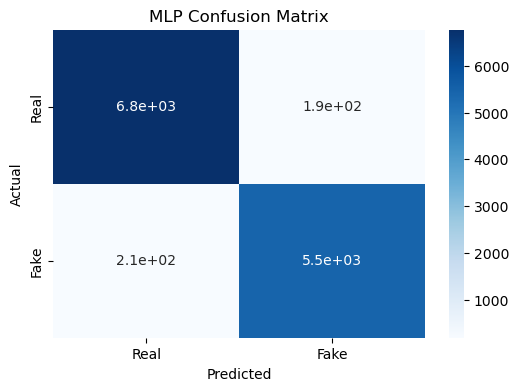

In [25]:
#Confusion matrix to visualize model predicted vs actual values
cm_mlp = confusion_matrix(y_test, y_pred_mlp) 

#Diagonal values means correct predictions, non-diagonal means misclassifications
#Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_mlp, annot=True, cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

Random (chance) prediction: AUROC = 0.5000
Random Forest: AUROC = 0.9947
Logistic Regression: AUROC = 0.9936
MLP: AUROC = 0.9952



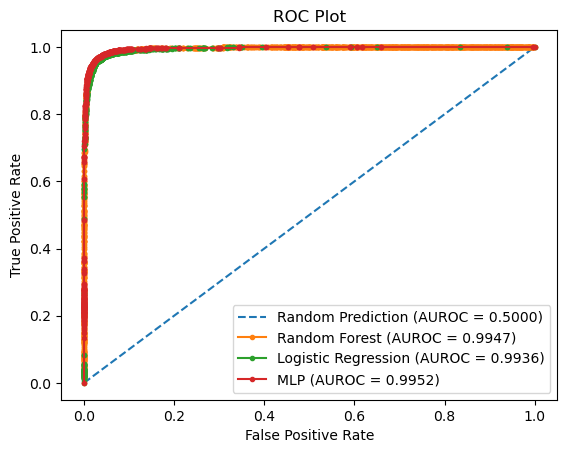

In [26]:
from sklearn.metrics import roc_curve, auc

#ROC Curve comparison of all models
#ROC (Receiver Operating Characteristic) shows balance between true positive and false positive rates

#Random baseline for comparison
r_probs = [0 for _ in range(len(y_test))]

#Get prediction probabilities for positive class (fake news) from each model
rf_probs = best_rf.predict_proba(X_test)[:, 1]
logreg_probs = best_logreg.predict_proba(X_test)[:, 1]
mlp_probs = best_mlp.predict_proba(X_test)[:, 1]

#Calculate AUC scores for all models
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

#Calculate False Positive Rate and True Positive Rate for ROC curves
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs) 
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs) 
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs) 
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs) 

# Print AUC scores
print('Random (chance) prediction: AUROC = %.4f' % (r_auc))
print('Random Forest: AUROC = %.4f' % (rf_auc))
print('Logistic Regression: AUROC = %.4f' % (logreg_auc))
print('MLP: AUROC = %.4f\n' % (mlp_auc))

# Plot ROC curves for visual comparison
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random Prediction (AUROC = %0.4f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUROC = %0.4f)' % rf_auc)
plt.plot(logreg_fpr, logreg_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.4f)' % logreg_auc)
plt.plot(mlp_fpr, mlp_tpr, marker = '.', label = 'MLP (AUROC = %0.4f)' % mlp_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [28]:
#Adding new text and title to try
new_title = "U.S. senator Exclusive: Wells Fargo account scandal extends to small business "
new_text = "NEW YORK (Reuters) - The scandal over improper sales practices at Wells Fargo & Co extended to thousands of small-business owners, according to a U.S. lawmaker, raising questions about the scope of the bank’s issues with unauthorized accounts. In a Sept. 29 letter viewed by Reuters on Tuesday, Sen. David Vitter, a Louisiana Republican, demanded that Wells Fargo Chief Executive John Stumpf provide a “full accounting” of customers affected. Vitter is a member of the U.S. Senate’s banking committee and also heads its small business committee. Discussions between congressional staffers and Wells Fargo “have indicated that the fraudulent activity of your employees was not limited to Wells Fargo’s consumer banking operations,” Vitter wrote."

#Feature preparation
title_caps_words = sum(1 for word in new_title.split() if word.isupper() and len(word) > 1)
title_exclamation = new_title.count('!')
text_exclamation = new_text.count('!')
title_avg_sentence_count = avg_sentence_count(new_title)
text_question_mark = new_text.count('?')

#Cleaning title and text
cleaned_title = re.sub(r'[^\w\s]', '', new_title.lower())
cleaned_text = re.sub(r'[^\w\s]', '', new_text.lower())

#TF-IDF vectorization
X_title_new = vectorizer_title.transform([cleaned_title])
X_text_new = vectorizer_text.transform([cleaned_text])

#Merge and horizontal stack
other_new = [[title_caps_words, title_avg_sentence_count, title_exclamation, text_exclamation, text_question_mark]]
X_new = hstack([X_title_new, X_text_new, other_new])

#Scale
X_new_scaled = scaler.transform(X_new)

#Prediction based on new title and text
prediction = best_mlp.predict(X_new_scaled)[0]
status = "REAL NEWS" if prediction == 1 else "FAKE NEWS"
print(status)

FAKE NEWS
